In [147]:
import shapely
from shapely.geometry import Point, Polygon, LineString, GeometryCollection
from shapely import wkt
import numpy as np
from shapely.ops import nearest_points
import random


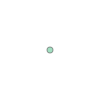

In [111]:
pt = Point(10,10)
pt1 = Point(100,101)
pt

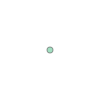

In [4]:
wkt.loads(str(pt))

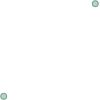

In [5]:
GeometryCollection([pt,pt1])

In [122]:
pt.distance(pt1)
pt.x, pt.y, pt.xy[1]

(10.0, 10.0, array('d', [10.0]))

In [7]:
pt.name = "Point 1"
pt.name

'Point 1'

In [124]:
ln = LineString([(1,1),[1,2],[2,2],(1.5,1.5)])
a=np.array(ln)
# list(ln.xy[0])
# ln.xy[1][1]
a

array([[1. , 1. ],
       [1. , 2. ],
       [2. , 2. ],
       [1.5, 1.5]])

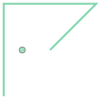

In [131]:
Point([1,1.5]).distance(ln)
# ln.project(Point([1,1])), ln.length
GeometryCollection([Point([1.2,1.5]),ln])

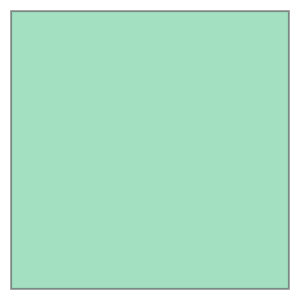

In [10]:
poly = Polygon([(50,50), (50,3950), (3950,3950), (3950,50)])
poly

In [13]:
p=poly.exterior
np.array(p)

array([[  50.,   50.],
       [  50., 3950.],
       [3950., 3950.],
       [3950.,   50.],
       [  50.,   50.]])

In [38]:
point = np.array((55,100))
point
pt = Point(point)
poly.contains(pt)

circle = pt.buffer(40)
circle.contains(Point([50,100]))

a = poly.exterior.project(pt)
b =poly.exterior.interpolate(a)


In [78]:
list(pt.coords[0]) == [pt.x, pt.y]


True

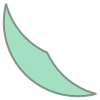

In [83]:
c1 = Point([1,1]).buffer(2)
c2 = Point([1,2]).buffer(2)
c3 = Point([2,1]).buffer(2)
c1.difference(c2).difference(c3)

In [144]:
Min = 50
Max = 3950
field = Polygon([(Min,Min), (Min,Max), (Max,Max), (Max,Min)])
field
pt = Point(point)
pt_new,_ = nearest_points(field,Point([0,0]))
pt = pt_new
field.difference(pt.buffer(400))

print([pt.x, pt.y])


[50.0, 50.0]


In [217]:
def get_random_arrangement(n_turbs):

    def get_point():
        """Returns random integer from 50 to 3950 inclusive"""
        return random.uniform(50,3950)

    def is_valid(point):
        """Checks if given point is valid"""
        point = np.array(point)
        point = np.reshape(point,(1,2))
        # getting array of distances to every other point
        dist = np.linalg.norm(turbine_pos - point,axis=1)
        return min(dist) > 400   # 400 is the problem constraint

    turbine_pos = np.full((n_turbs,2),np.inf)
    turb_list = []
    count = 0
    while count < n_turbs:
        point = [get_point(),get_point()] # x,y
        if is_valid(point):
            turbine_pos[count,:] = point
            count += 1
            # turb_list.append(point)
    return turbine_pos

In [218]:
turb = get_random_arrangement(50)
turb

array([[1282.13063743, 1028.10445896],
       [ 149.10334098, 2809.64453596],
       [ 504.70549802,  528.73164709],
       [3131.87732507,  344.52241405],
       [2670.97946684,  179.05324394],
       [2956.9397582 , 2380.72005226],
       [2409.96571846, 3797.33827287],
       [ 881.33481417, 2490.09571014],
       [1106.11697105, 3403.61066045],
       [3332.40403519, 3949.07906035],
       [ 849.11355206, 1326.62989893],
       [ 357.79574634, 3358.88934118],
       [2401.32454077,  948.019967  ],
       [1787.59169145, 2073.70545412],
       [2048.81649288,  706.58647042],
       [2971.52249953, 1617.76555306],
       [1676.19626571, 2731.35388175],
       [1842.24773831, 3428.8294188 ],
       [ 311.59820039, 2197.6566028 ],
       [3602.23785409, 2497.25494912],
       [1119.86552192,  651.34355666],
       [1866.29699739, 1511.93883055],
       [ 734.29592825, 1973.11306086],
       [3919.15225008, 3750.48447406],
       [3570.37146818,  553.66848167],
       [ 495.24673327, 10

In [222]:
from numpy import array
a = [array([1596.36676121,  138.45422947]), array([ 977.41222868, 3397.30858118]), array([1371.70470451,  531.2721245 ]), array([2152.18943217, 3880.48267978]), array([1474.30494376, 1761.45855404]), array([145.58466423, 170.67563354]), array([2876.71154606, 3241.47635077]), array([ 578.94637377, 3696.4916067 ]), array([1392.52440778, 2270.74510658]), array([1791.96180458, 2126.66951367]), array([1172.20025507, 1233.44428622]), array([1276.35619279, 3064.07883597]), array([2331.18901678,  291.90218119]), array([2341.52245709, 3525.57889301]), array([3510.0296964 ,  306.20498409]), array([3407.70024525, 2624.86909089]), array([3946.70422003, 1924.97876881]), array([3793.33607545, 1507.35748822]), array([3460.18500294,  805.0856397 ]), array([2043.56499184, 2815.61213104]), array([3777.90578332, 3084.70566871]), array([762.17779674, 148.1203289 ]), array([ 749.75514296, 1899.91662296]), array([3224.65576059, 1496.38742026]), array([ 175.77767411, 1383.17447608]), array([ 672.94228433, 2378.52148934]), array([2254.93414603,  711.87246433]), array([1178.47195092, 3940.70301147]), array([2717.08265181, 1296.4174027 ]), array([2966.97119241, 2489.45494755]), array([448.92815815, 740.20884466]), array([2881.69941061, 1785.83880112]), array([ 185.04395974, 1981.40952189]), array([2969.26296853, 3788.86913382]), array([2853.66198343,   81.1139672 ]), array([3777.49797618, 3493.83819141]), array([1653.03887257, 1287.00257804]), array([ 763.13090013, 1241.02433756]), array([2441.31059335, 2213.22435888]), array([2239.50479809, 1642.52236884]), array([3918.47611465, 2700.96671189]), array([1663.29742039, 3692.1217649 ]), array([ 577.47046314, 3218.57543382]), array([  77.07732733, 3390.31945306]), array([ 163.08420983, 2685.67971257]), array([3314.21289245, 3409.40469451]), array([3949.64802346,   62.34615667]), array([ 188.30677386, 3924.57049728]), array([3421.82260615, 2099.06969608]), array([3880.21797336, 1037.58085478])]


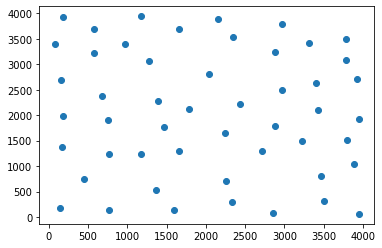

In [225]:
import pandas as pd
import matplotlib.pyplot as plt

b = pd.DataFrame(a,columns=['x','y'])
b.head()
b.to_csv("data.csv", index=False)
plt.scatter(b.x,b.y)


In [175]:
a = np.array(pd.read_csv("/home/ananthu/Workspace/Shell AI Hackathon/Trials/opt_swarm_ans7.csv"))

In [226]:
a = np.array(pd.read_csv("/home/ananthu/Workspace/Shell AI Hackathon/EA/data.csv"))

In [223]:
from shapely.geometry import MultiPoint
points = MultiPoint(a)


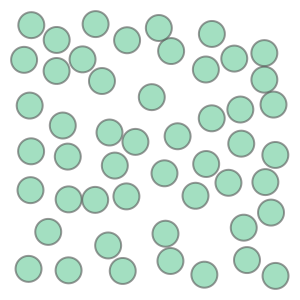

In [224]:
points.buffer(200)

In [196]:
p = [[1],[2],[3]]

q = random.choices(population=p,k=2)


In [198]:
q[1] is p[0]

True

In [220]:
a = np.array(pd.read_csv("/home/ananthu/Workspace/Shell AI Hackathon/PSO/oswarm3.csv"))

In [227]:
a

array([[1596.36676121,  138.45422947],
       [ 977.35644651, 3397.25279901],
       [1371.66352873,  531.23094872],
       [2152.18943217, 3880.48267978],
       [1474.30494376, 1761.45855404],
       [ 145.77529213,  170.86626144],
       [2876.5517584 , 3241.31656311],
       [ 578.94637377, 3696.4916067 ],
       [1392.37092802, 2270.59162683],
       [1791.80058046, 2126.50828955],
       [1172.20025507, 1233.44428622],
       [1276.35619279, 3064.07883597],
       [2331.04998686,  291.76315127],
       [2341.08003751, 3525.13647344],
       [3509.74373678,  305.91902447],
       [3407.70024525, 2624.86909089],
       [3946.74467453, 1925.01922331],
       [3793.66307558, 1507.68448835],
       [3460.18500294,  805.0856397 ],
       [2043.45918015, 2815.50631935],
       [3777.62731713, 3084.42720253],
       [ 762.17779674,  148.1203289 ],
       [ 749.75514296, 1899.91662296],
       [3224.76477593, 1496.4964356 ],
       [ 175.77767411, 1383.17447608],
       [ 672.80551515, 23